In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

In [3]:
y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

In [4]:
Y1, Y2 = np.meshgrid(y1, y2)

In [5]:
t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape

In [6]:
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

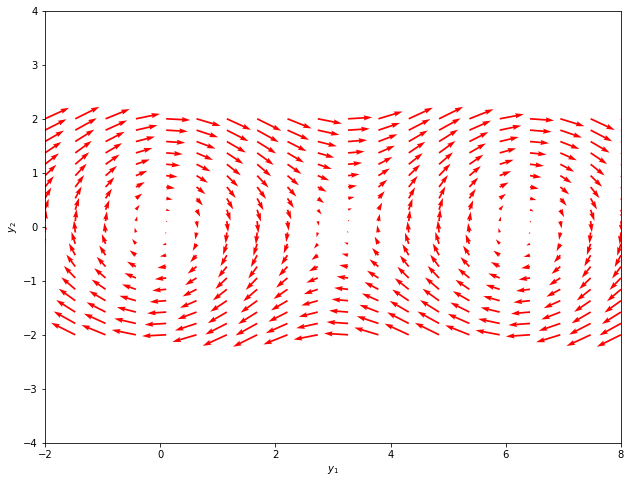

In [7]:
fig1=plt.figure(figsize=(1,1.5))
ax1=fig1.add_axes([0.,0.,8.,4.])
Q=ax1.quiver(Y1, Y2, u, v, color='r')
ax1.set_xlabel('$y_1$')
ax1.set_ylabel('$y_2$')
ax1.set_xlim([-2, 8])
ax1.set_ylim([-4, 4])
fig1.savefig('phase-portrait.png')



In [8]:
from scipy.integrate import odeint

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


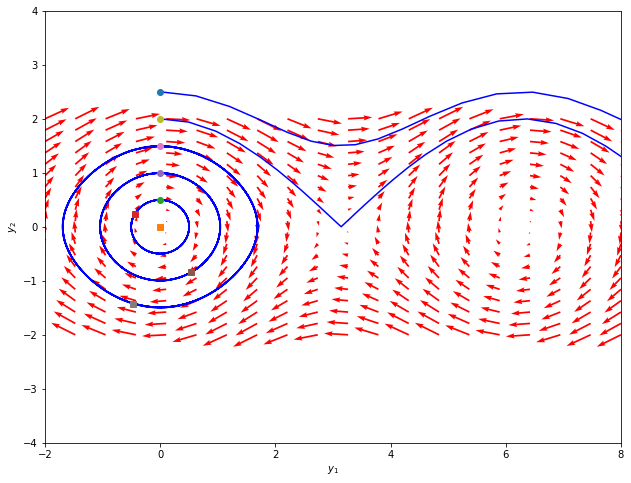

In [9]:
#fig1
ax2=fig1.add_subplot([0.,0.,8.,4.])

for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    ax2.plot(ys[:,0], ys[:,1], 'b-') # path
    ax2.plot([ys[0,0]], [ys[0,1]], 'o') # start
    ax2.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    ax2.set_xlim([-2, 8])
fig1.savefig('phase-portrait-2.png')
fig1.savefig('myplot2.png', bbox_inches='tight')
fig1.savefig('myplot.eps', bbox_inches='tight')
fig1